# Simulate N-of-1 Trial with 1 Moderator Variable and fit different models

In [71]:
import json
from sinot.simulation import Simulation
import arviz as az
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import pandas as pd

In [12]:
# Load example params
with open("sinot/example/example_params.json") as fp:
    study_params = json.load(fp)

drop_out={
    "fraction":1,
    "vacation":0
}

study_design = [None, "Treatment_1","Treatment_2","Treatment_1","Treatment_2"]

days_per_period = 28


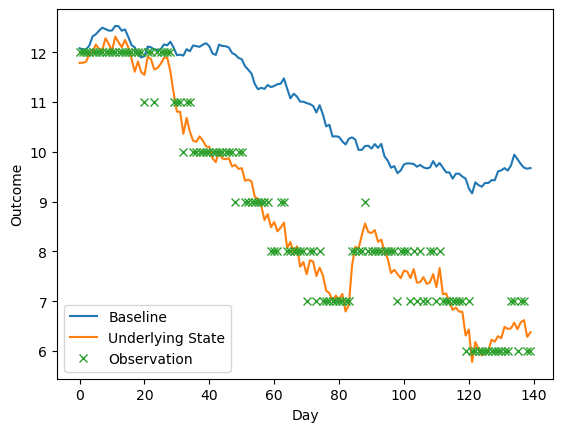

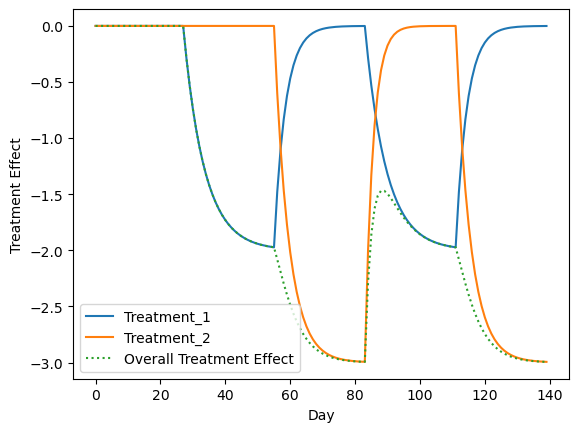

In [13]:
sim = Simulation(study_params)
pat_complete, pat_drop = sim.gen_patient(study_design, days_per_period, drop_out=drop_out)
sim.plot_patient(pat_complete)

In [52]:
# Define constants
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
from numpy.random import default_rng
rng = default_rng()

n_observations = 100
treatment_window_length = 10
treatment_order = [1,2,1,2]
treatments = np.repeat(treatment_order,n_observations / len(treatment_order))

In [53]:
# Simulation constants
mu_p_true = 1
epsilon_i_mean_true = 1
epsilon_i_mean_sigma = 1
mu_T_1_true = 1
mu_T_2_true = 2
alpha_T_1_true = 1
alpha_T_2_true = 1

## DAG formula

$ O = \mu_p + \epsilon_i + \mathbb{1}(T_i = \text{active}) (\mu_T + \alpha_{T_i} (c - \mu_c))$

- $\mu_p$ - Population baseline mean
- $\epsilon_i$ - Individual baseline mean
- $\mu_T$ - Average Treatment Effect
- $\alpha_{T_i, c}$ - Moderator Slope for Treatment i and c
- $\mu_c$ - Intercept for c 
- $c$ - Value of covariate c

In [64]:
simulation = {
'mu_p': mu_p_true,
'epsilon_i': epsilon_i_mean_true + epsilon_i_mean_sigma * rng.standard_normal(n_observations),
'mu_T_1' = mu_T_1_true
'mu_T_2' = mu_T_2_true
'alpha_T_1' = alpha_T_1_true
'alpha_T_2' = alpha_T_2_true
'c' = rng.standard_normal(n_observations)
}
# c already normalized so we do not cover mu_c

In [65]:
O = mu_p + epsilon_i
+ ((treatments == 1) * (mu_T_1 + alpha_T_1 * c))
+ ((treatments == 2) * (mu_T_2 + alpha_T_2 * c))
O

array([ 2.6244189 ,  2.35815092,  0.93338674,  2.70822641,  1.49501925,
        3.53922723,  1.41320667,  1.5885008 ,  1.92305938,  0.57704449,
        1.30930607,  0.58978435,  3.170977  ,  2.69501943,  2.20025719,
        1.34813119,  1.91063571,  3.80118329,  2.39862636,  0.4102668 ,
       -0.2274721 ,  0.77571483,  0.62060802,  1.6481972 ,  3.17090083,
        3.85148388,  1.59707289,  1.5262578 ,  1.31089235,  1.92032083,
        2.46714279,  2.89063828,  2.9211303 ,  0.34260306,  3.35634459,
        2.25199049,  2.10656016,  1.01214235,  2.97499097,  0.57961224,
        2.4280169 ,  1.84180176,  2.94224849,  0.23023928,  2.48516134,
        2.55311243,  3.26908481,  1.48361423,  2.01646211,  0.10129566,
        0.66848202,  2.1531172 ,  2.4632371 ,  2.18852055,  1.34690178,
        1.55551896,  0.71361512,  2.11417377, -0.78244968,  1.2391731 ,
        3.58361217,  0.90243269,  2.17923098,  1.90977918,  1.54322831,
        2.22865381,  4.0110764 ,  0.66716116,  2.41110292,  1.60

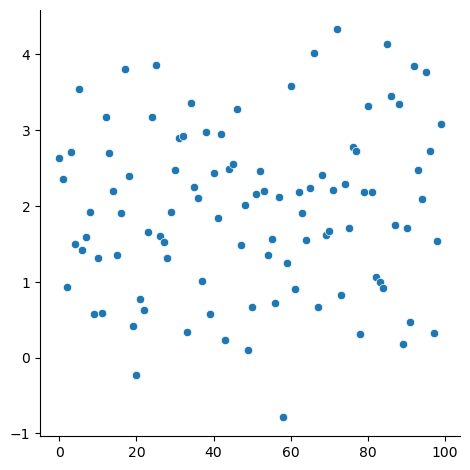

In [69]:
sns.relplot(O)